# **============= THE HOUSE PRICE PREDICTION ========**

This project is about to predict price of the house with 80 variable/features from data residential homes in Ames, Iowa. We will use CRISP DM Framework to handle this project with these following steps below:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation

# 1. Business Understanding

Before we go further to another steps, the first thing to do is to understand the business or the aim of the project and what metric we have to use to measure. The usual business or implementation of this kind project is in real estate industry. The project with the same context like this will help the marketing, sales, and project manager to predict the best price with some variables that might be suitable with their project either location or number of rooms and maybe with some others variables that they want to input.


# 2. Data Understanding

The dataset for this project is came from residential homes in Ames, Iowa. There are 80 varaibles to help predict the price of the house. The variables are:


1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
1.     MSSubClass: The building class
1.     MSZoning: The general zoning classification
1.     LotFrontage: Linear feet of street connected to property
1.     LotArea: Lot size in square feet
1.     Street: Type of road access
1.     Alley: Type of alley access
1.     LotShape: General shape of property
1.     LandContour: Flatness of the property
1.     Utilities: Type of utilities available
1.     LotConfig: Lot configuration
1.     LandSlope: Slope of property
1.     Neighborhood: Physical locations within Ames city limits
1.     Condition1: Proximity to main road or railroad
1.     Condition2: Proximity to main road or railroad (if a second is present)
1.     BldgType: Type of dwelling
1.     HouseStyle: Style of dwelling
1.     OverallQual: Overall material and finish quality
1.     OverallCond: Overall condition rating
1.     YearBuilt: Original construction date
1.     YearRemodAdd: Remodel date
1.     RoofStyle: Type of roof
1.     RoofMatl: Roof material
1.     Exterior1st: Exterior covering on house
1.     Exterior2nd: Exterior covering on house (if more than one material)
1.     MasVnrType: Masonry veneer type
1.     MasVnrArea: Masonry veneer area in square feet
1.     ExterQual: Exterior material quality
1.     ExterCond: Present condition of the material on the exterior
1.     Foundation: Type of foundation
1.     BsmtQual: Height of the basement
1.     BsmtCond: General condition of the basement
1.     BsmtExposure: Walkout or garden level basement walls
1.     BsmtFinType1: Quality of basement finished area
1.     BsmtFinSF1: Type 1 finished square feet
1.     BsmtFinType2: Quality of second finished area (if present)
1.     BsmtFinSF2: Type 2 finished square feet
1.     BsmtUnfSF: Unfinished square feet of basement area
1.     TotalBsmtSF: Total square feet of basement area
1.     Heating: Type of heating
1.     HeatingQC: Heating quality and condition
1.     CentralAir: Central air conditioning
1.     Electrical: Electrical system
1.     1stFlrSF: First Floor square feet
1.     2ndFlrSF: Second floor square feet
1.     LowQualFinSF: Low quality finished square feet (all floors)
1.     GrLivArea: Above grade (ground) living area square feet
1.     BsmtFullBath: Basement full bathrooms
1.     BsmtHalfBath: Basement half bathrooms
1.     FullBath: Full bathrooms above grade
1.     HalfBath: Half baths above grade
1.     Bedroom: Number of bedrooms above basement level
1.     Kitchen: Number of kitchens
1.     KitchenQual: Kitchen quality
1.     TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
1.     Functional: Home functionality rating
1.     Fireplaces: Number of fireplaces
1.     FireplaceQu: Fireplace quality
1.     GarageType: Garage location
1.     GarageYrBlt: Year garage was built
1.     GarageFinish: Interior finish of the garage
1.     GarageCars: Size of garage in car capacity
1.     GarageArea: Size of garage in square feet
1.     GarageQual: Garage quality
1.     GarageCond: Garage condition
1.     PavedDrive: Paved driveway
1.     WoodDeckSF: Wood deck area in square feet
1.     OpenPorchSF: Open porch area in square feet
1.     EnclosedPorch: Enclosed porch area in square feet
1.     3SsnPorch: Three season porch area in square feet
1.     ScreenPorch: Screen porch area in square feet
1.     PoolArea: Pool area in square feet
1.     PoolQC: Pool quality
1.     Fence: Fence quality
1.     MiscFeature: Miscellaneous feature not covered in other categories
1.     MiscVal: $Value of miscellaneous feature
1.     MoSold: Month Sold
1.     YrSold: Year Sold
1.     SaleType: Type of sale
1.     SaleCondition: Condition of sale


# 3. Data Preparation

The data preparation is step to make data ready for training, testing and implement algorithm. One of the benefit about data preparation is to help our prediction is more accurate. Data preparation have several tasks like:

1. Data Cleaning: Identifying and correcting mistakes or errors in the data.

2. Data Transforms: Changing the scale or distribution of variables.

3. Feature Engineering: Deriving new variables from available data.

4. Feature Selection: Identifying those input variables that are most relevant to the task.

5. Dimensionality Reduction: Creating compact projections of the data.


In [1]:
#Import Libraries
import math #Mathematical computation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
from sklearn.preprocessing import MinMaxScaler #Fetaure Scaling
from sklearn.linear_model import Lasso #Feature Selection
from sklearn.feature_selection import SelectFromModel #Feature Selection
from sklearn.model_selection import train_test_split #Spliting data to train & test
from sklearn.linear_model import LinearRegression #Modeling
from sklearn.metrics import r2_score, mean_squared_error #Evaluation Matrics

pd.pandas.set_option('display.max_columns',None) #to see all columns when displaying

In [2]:
#Check file in directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [3]:
#Load the data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.1 Data Cleaning

There are many reasons data may have incorrect values, such as being mistyped, corrupted, duplicated, and so on. Nevertheless, there are general data cleaning operations that can be performed, such as:
* Using statistics to define normal data and identify outliers.
* Identifying columns that have the same value or no variance and removing them.
* Identifying duplicate rows of data and removing them.
* Marking empty values as missing.
* Imputing missing values using statistics or a learned mode

Before doing data preparation, we want to know some basic information about our dataset like number of rows, columns, memory, data types, etc.

In [4]:
#Check basic info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Data types
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [6]:
#Spliting Numeric And Categorical Fetaures
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
categorical_features = [feature for feature in train.columns if train[feature].dtypes == 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature] #Fetaure that contain year

#Spliting Continous and Discrete
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']] #descrete feature 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]

### 3.1.1 Duplicates Input
We want to ensure the datat in our dataset is unique, there is no duplicates with some variables in every columns. So we have to delete if we find any duplicates input.

In [7]:
#Check if any duplicates input
print('We have',train.duplicated().sum(),'number of duplicate input')

We have 0 number of duplicate input


### 3.1.2 Missing Values

Missing value is where data there is no input. We have to find it, if numbers of missing values in columns high, we might drop the column, but if it low, we can replace with some statistical value. But, before we delete or replace that input, we have to ask the domain expert to make it more valid.

Before we go any further, we want to split our data into two, numerical and categorical feattures. Because by spliting the dataset we can handling data preparation more clear and quickly.

In [8]:
#Spliting data into numerical and categorical
numerical_with_nan=[feature for feature in train.columns if train[feature].isnull().sum()>=1 and train[feature].dtypes!='O'] #numerical features
categorical_with_nan = [feature for feature in train.columns if train[feature].isnull().sum()>=1 and train[feature].dtypes=='O'] #categorical features

In [9]:
#Check if any missing values
round((train[numerical_with_nan].isnull().sum() / len(train[numerical_with_nan]) *100),2).sort_values(ascending=False)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
dtype: float64

As we can see abooce, there are several numerical columns that have missing values, because the percentage of missing values is not big, so we want to fill that with median. Because median is more robust or not sensitive than mean.

In [10]:
#Replacing the numerical fetaures missing value with median
for feature in numerical_with_nan:
    median= train[feature].median()
    train[feature].fillna(median,inplace=True)
    
train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

After handling the numerical features, now we move to categorical features with missing values. We will handle missing values in numerical with mode. But, we have to see how many missing value there.

In [11]:
round((train[categorical_with_nan].isnull().sum() / len(train[categorical_with_nan]) *100),2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
GarageType       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
Electrical       0.07
dtype: float64

There are several columns with more than 40% missing values, so the better way is to drop because if we fill with value, it tends to wrong input. So we can drop these columns and for columns with mising value below 40% we can fill with mode, it we will reasonable.

In [12]:
#Drop columns with high missing values
train = train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

In [13]:
categorical_with_nan = [feature for feature in train.columns if train[feature].isnull().sum()>=1 and train[feature].dtypes=='O']

In [14]:
#Replacing the categorical features missing value with mode
for feature in categorical_with_nan:
    mode = train[feature].mode()[0]
    train[feature].fillna(mode,inplace=True)
    
train[categorical_with_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

Because we see in our dataset have year value in several columns, so we convert that into number year by substract year sold with other years features.

In [15]:
#Get tne numbe of year
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train[feature]= train['YrSold'] - train[feature]
    
train[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


### 3.1.3 Checking Outliers

Outliers is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error, the latter are sometimes excluded from the data set.

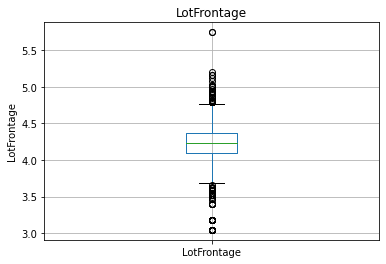

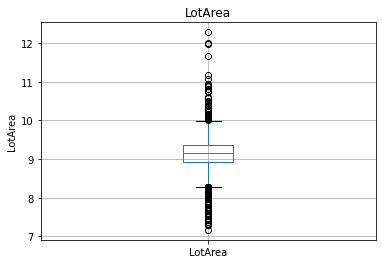

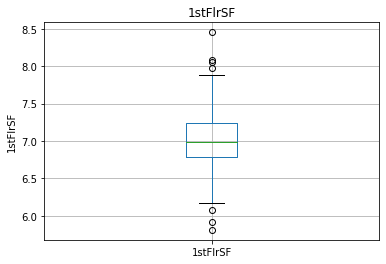

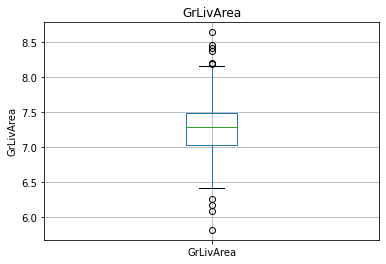

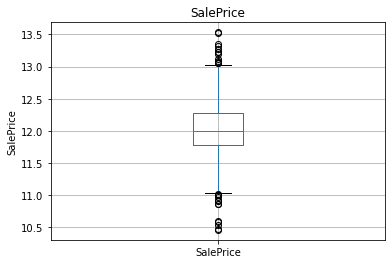

In [16]:
#Visualize Outliers in our continous variable
for feature in continuous_feature:
    data = train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

 ## 3.2 Data Transformation
 
At this step, we want to transform our data more reliable into model with transform the data that have skewed, different scale or hadling categorical features.

### 3.2.1 Transform Skewed Fetaures
We will se the distribution of continuos faetaures, is there are any skewed featrues or not.

In [17]:
#Spliting Numeric And Categorical Fetaures
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
categorical_features = [feature for feature in train.columns if train[feature].dtypes == 'O']
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature] #Fetaure that contain year

#Spliting Continous and Discrete
discrete_feature=[feature for feature in numerical_features if len(train[feature].unique())<25 and feature not in year_feature+['Id']] #descrete feature 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]

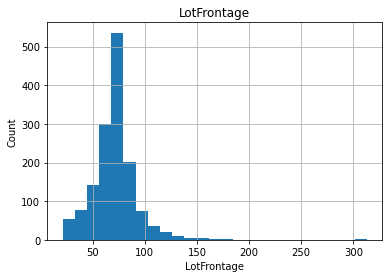

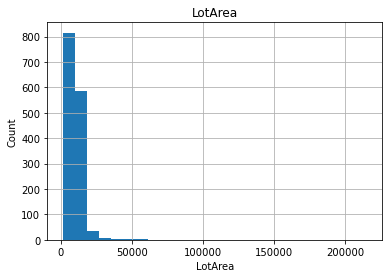

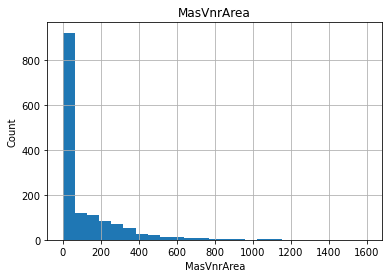

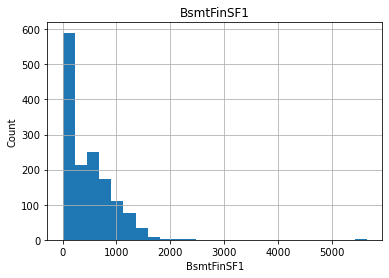

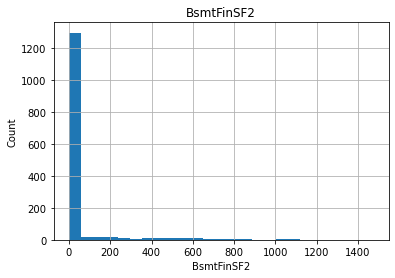

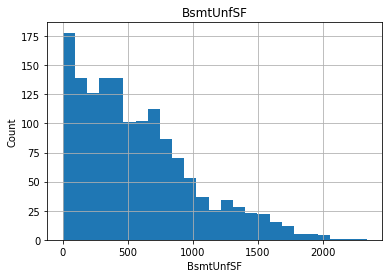

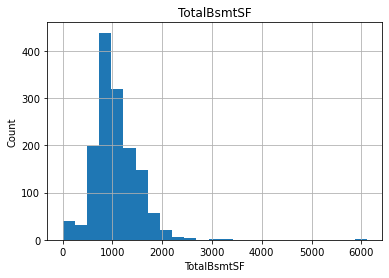

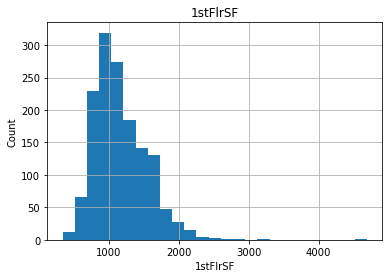

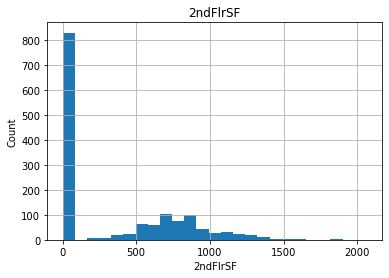

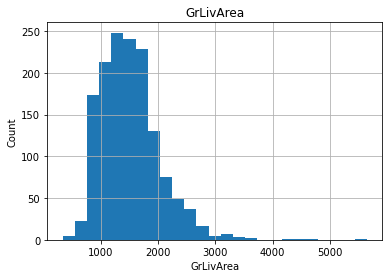

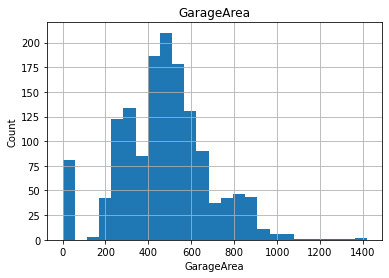

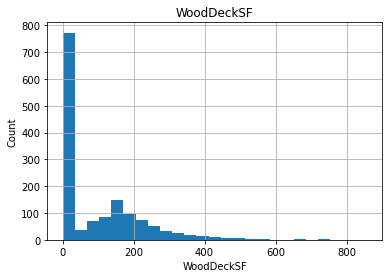

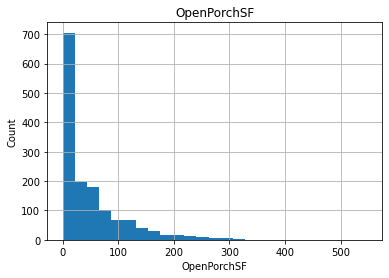

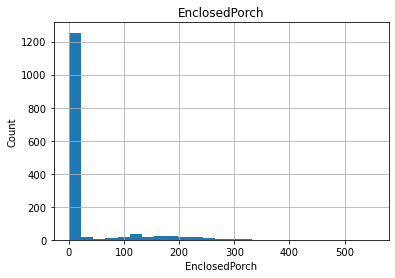

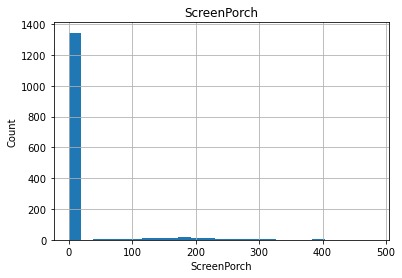

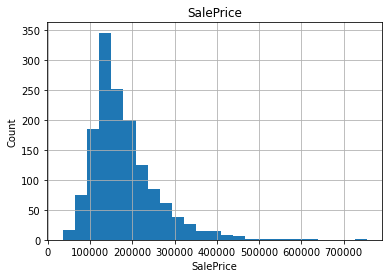

In [18]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

As we can see above, there are several feature that have skewed distribution. We have to convert that into more normal / gaussian distribution to make our model more accurate. So we will transform those features with logaritmic transformation to make it more normal distribution.

In [19]:
#Transform skewed distribution into normal distribution 
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]=np.log(train[feature])

### 3.2.2 Label Encoding For Categorical

Since we have categorical variable, and our predidction is continous, so we have to transform it to numeric. We will use label encoding to transform that.

In [20]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429216


In [21]:
#Lable encoding
for feature in categorical_features:
    labels_ordered = train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    train[feature] = train[feature].map(labels_ordered)

In [22]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,2,196.0,2,3,5,2,2,0,5,706,3,0,150,856,5,4,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,4,5.0,1,2,548,2,3,2,0,61,0,0,0,0,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.0,1,3,2,2,2,3,4,978,3,0,284,1262,5,4,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,4,31.0,1,2,460,2,3,2,298,0,0,0,0,0,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,2,162.0,2,3,5,2,2,1,5,486,3,0,434,920,5,4,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,4,7.0,1,2,608,2,3,2,0,42,0,0,0,0,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,1,0.0,1,3,1,1,3,0,4,216,3,0,540,756,5,3,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,1,8.0,0,3,642,2,3,2,0,35,272,0,0,0,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,2,350.0,2,3,5,2,2,2,5,655,3,0,490,1145,5,4,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,4,8.0,1,3,836,2,3,2,192,84,0,0,0,0,0,12,2008,4,4,12.429216


### 3.2.3 Fetaure Scaling

We know that our data is vary in unit and magnitude or in scale. So we have to make it all similar in scale. We wil use min max scaler, because i tried standard scaler, but it is more high acuracy.

In [23]:
#Perform feature scaling
feature_scale=[feature for feature in train.columns if feature not in ['Id','SalePrice']]
scaler=MinMaxScaler()
scaler.fit(train[feature_scale])

MinMaxScaler()

In [24]:
#Concat the id and sales price with scaled dataset
data = pd.concat([train[['Id', 'SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(train[feature_scale]), columns=feature_scale)],axis=1)

In [25]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.666667,0.12250,0.666667,0.75,1.0,0.666667,0.666667,0.000000,1.0,0.125089,0.6,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.8,0.046729,0.5,0.50,0.386460,0.5,0.75,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.333333,0.00000,0.333333,0.75,0.4,0.666667,0.666667,1.000000,0.8,0.173281,0.6,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.8,0.289720,0.5,0.50,0.324401,0.5,0.75,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.666667,0.10125,0.666667,0.75,1.0,0.666667,0.666667,0.333333,1.0,0.086109,0.6,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.065421,0.5,0.50,0.428773,0.5,0.75,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.333333,0.00000,0.333333,0.75,0.2,0.333333,1.000000,0.000000,0.8,0.038271,0.6,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.2,0.074766,0.0,0.75,0.452750,0.5,0.75,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.666667,0.21875,0.666667,0.75,1.0,0.666667,0.666667,0.666667,1.0,0.116052,0.6,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.8,0.074766,0.5,0.75,0.589563,0.5,0.75,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.5,0.8


We can see that our dataset now have the same scale on all features exclude Sales and Id. After feature scaling, we perform feture selection to choose relevant features to our target feature or SalesPrice feature.

## 3.3 Feature Selection

Feature selection is the process of identifying and selecting a subset of input variables that are most relevant to the target variable. We will use L1 Regularization or Lasso method to select fetaures that relevant. Lasso regression performs L1 regularization which adds penalty (alpha) equivalent to absolute value of the magnitude of coefficients. Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [26]:
#Select target/dependent feature
y_train = data[['SalePrice']]

#Select independent feature
X_train = data.drop(['Id','SalePrice'],axis=1)

In [27]:
# Apply Feature Selection
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [28]:
#Print selected features
# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

#Pint total features, selected, and regularized features
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 74
selected features: 17
features with coefficients shrank to zero: 57


We can see that from 74 features, we selected 17 features that relevant to our target features and drop 57 irrelevant features.

In [29]:
#See selected features
selected_feat

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'SaleCondition'],
      dtype='object')

In [30]:
#Select the relevant feature become our new data
X_train= data[selected_feat]
X_train.head()

,MSSubClass,Neighborhood,OverallQual,YearRemodAdd,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,0.235294,0.625000,0.666667,0.098361,0.666667,0.000000,1.00,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.5,0.50,1.0,0.8
1,0.000000,0.833333,0.555556,0.524590,0.666667,1.000000,1.00,1.0,0.503056,0.470245,0.000000,0.333333,0.333333,0.5,0.50,1.0,0.8
2,0.235294,0.625000,0.666667,0.114754,0.666667,0.333333,1.00,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.5,0.50,1.0,0.8
3,0.294118,0.708333,0.666667,0.606557,0.333333,0.000000,0.75,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.0,0.75,1.0,0.2
4,0.235294,1.000000,0.777778,0.147541,0.666667,0.666667,1.00,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.5,0.75,1.0,0.8


# 4. Modeling

Modeling means training a machine learning algorithm to predict the labels/value from our features/variables. Because is is justa simple task to undertand the workflow of machine learning. So we will use multiple linear regression to be our algorithm. Beacuse it more simple and easy to interpret the result.

In [31]:
#Select target/dependent feature
Y = data[['SalePrice']]

#Select independent feature
X = data[selected_feat]

In [32]:
#Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=0)

In [33]:
#Build Multiple Linear Model
model = LinearRegression()
model.fit(X_train, y_train)

#Make prediction
y_pred = model.predict(X_test)

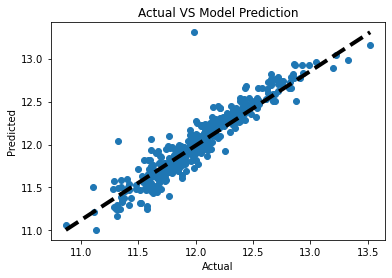

In [34]:
#Visualize using scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual VS Model Prediction')
plt.show()

# 5. Evaluation

To know the performance of our model, we need to evalute the model with several metrics. In this project, beacuse this is a regression model, so we will evaluate the model using Root Mean Squared Error (RMSE) adn Coefficient of Determination (R2).

In [35]:
#Checek evaluation metrics using RMSE and R2
print('Root Mean Square Error test = ' + str(math.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 Score = ' + str(r2_score(y_test, y_pred)))

Root Mean Square Error test = 0.13902524440523656
R2 Score = 0.8749085715004972


We can see from our mterics evaluation that we have Root Mean Squared Error (RMSE) is 0.1390 and Coefficient Of Determination (R2). From RMSE indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values, the lower RMSE the better. We can interprete RMSE as the average amount of error; in this case, the average difference between homes’ actual and predicted prices. For R2, we can interpret R-squared as the percentage of the dependent variable variation that is explained by a linear model. In a simple way, how good-fit our model is. So the more is better.

In [36]:
#Cehcek Intercept
print('Intercept:', model.intercept_)

Intercept: [10.37285076]


In [37]:
#Check Coefficeient in each 
print('Coefficients: \n', model.coef_)

Coefficients: 
 [[-0.12893023  0.25862849  0.62448144 -0.06180387  0.06051628  0.05862794
   0.04140059  0.11836181  0.21198296  1.1509319   0.20927479  0.10477775
   0.10384514  0.01499472  0.16250703  0.06052905  0.14076396]]


In [38]:
#Feature Names
selected_feat

Index(['MSSubClass', 'Neighborhood', 'OverallQual', 'YearRemodAdd', 'BsmtQual',
       'BsmtExposure', 'HeatingQC', 'CentralAir', '1stFlrSF', 'GrLivArea',
       'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageFinish',
       'GarageCars', 'PavedDrive', 'SaleCondition'],
      dtype='object')

From reslut of intercept and coefficeint, we can construct the function of our model. So the function will look like this:

    y(x) =  Intercept + C(MSSubclass) + C(Neighborhood) + C(OverallQuall) + C(YearRemodAdd) + C(BsmtQual) + C(BsmtExposure) + C(HeatingQC) + C(CentralAir) + C(1stFlrSF) + C(GrLivArea) + C(BsmtFullBath) + C(KitchenQual) + C(Fireplace) + C(GarageFinish) + C(GarageCars) + C(PavedDrive) + C(SaleCondition) + E

## **=============== Additional Evaluation ===========**
if you wan to know or make sure your model is good or valid, you can check with these assumption.

## 4.2 Checking Regression Assumtion
Linear regression analysis has five key assumptions. These are:
1. Linear relationship
2. All variables follow a normal distribution
3. There is very little or no multicollinearity
4. There is little or no autocorrelation
5. Data is homoscedastic

### 4.2.1 Linear Relationship
we are aiming at finding a linear relationship between the independent and dependent variables when running a linear regression model. A simple visual way of determining this is through the use of scatter plots. 

### 4.2.2 Normal Distribution
This assumtion is that the variables follow a normal distribution. In order words, we want to make sure that for each x value, y is a random variable following a normal distribution and its mean lies on the regression line. One of the ways to visually test for this assumption is through the use of the Q-Q-Plot. Q-Q stands for Quantile-Quantile plot and is a technique to compare two probability distributions in a visual manner.

### 4.2.3 Little or No Multicollinearity
Multicollinearity is a fancy way of saying that your independent variables are highly correlated with each other. Remember the name of your X’s, they are called independent variables for a reason. If multicollinearity exists between them, they are no longer independent and this generates issues when modeling linear regressions.

### 4.2.4 No Autocorrelation
When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.

### 4.2.5 Homoscedacity
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.